<IPython.core.display.Javascript object>


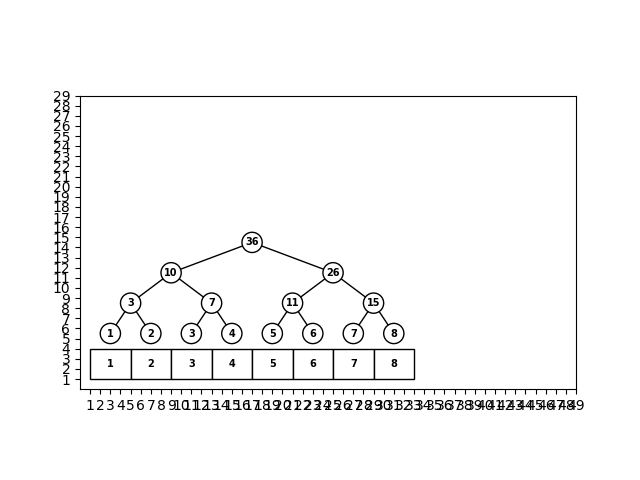

In [64]:
import numpy as np
import math 
import matplotlib.pyplot as plt
from matplotlib.table import table
from matplotlib.transforms import Bbox
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from matplotlib.patches import Path
from matplotlib.patches import PathPatch
import ipywidgets as widgets 
%matplotlib nbagg 
def create_array_rep(arr,x,y,w,h,ax): 
    rep = [None for i in range(0,len(arr))]
    for i in range(0,len(arr)): 
        r = Rectangle((x, y), w, h,edgecolor = 'black',facecolor = 'white')
        ax.add_patch(r)
        rx, ry = r.get_xy()
        cx = rx + r.get_width()/2.0
        cy = ry + r.get_height()/2.0
        anot = ax.annotate(str(arr[i]), (cx, cy), color='black', weight='bold', fontsize=7, ha='center', va='center')
        rep[i] = (r,anot)
        x = x + w
    return rep
def inter_points(rad,x1,y1,x2,y2): 
    phi = math.atan2(y2-y1, x2-x1)
    x = x1 + rad * math.cos(phi)
    y = y1 + rad * math.sin(phi)
    return (x,y)
def create_segment_tree(arr,arr_rep,ax): 
    rad = 1.0 
    n = len(arr)
    seg_tree_rep = [None for i in range(0,len(arr)*2) ]
    seg_tree = [0 for i in range(0,len(arr)*2)]
    #pone las hojas 
    for i in range(0,len(arr)): 
        (x,y) = arr_rep[i][0].get_xy()
        cx = x + arr_rep[i][0].get_width()/2.0
        cy = y + arr_rep[i][0].get_height()/2.0
        c = Circle((cx,cy + 3),radius = 1.0,facecolor = 'white',edgecolor = 'black')
        anot = ax.annotate(str(arr[i]), (cx, cy + 3), color='black', weight='bold', fontsize=7, ha='center', va='center')
        ax.add_patch(c)
        seg_tree[i+n] = arr[i]
        seg_tree_rep[i+n] = (c,anot)
    #pone el resto de nodos internos 
    for i in range(n -1,0,-1): 
        seg_tree[i] = seg_tree[2*i] + seg_tree[2*i + 1]
        lx = seg_tree_rep[2*i][0].get_center()[0]
        rx = seg_tree_rep[2*i + 1][0].get_center()[0]
        ly = seg_tree_rep[2*i][0].get_center()[1]
        ry = seg_tree_rep[2*i + 1][0].get_center()[1]
        cx = (lx + rx)/2.0
        cy  = ly + 3
        c = Circle((cx,cy),radius = rad,facecolor = 'white',edgecolor = 'black')
        anot = ax.annotate(str(seg_tree[2*i] + seg_tree[2*i + 1]), (cx, cy), color='black', weight='bold', fontsize=7, ha='center', va='center')
        ax.add_patch(c)
        seg_tree_rep[i] = (c,anot)
        #falta cómo añadirle las líneas 
        linea = PathPatch(Path([inter_points(rad,cx,cy,lx,ly),inter_points(rad,lx,ly,cx,cy)]), facecolor='none', edgecolor='black')
        ax.add_patch(linea)
        linea = PathPatch(Path([inter_points(rad,cx,cy,rx,ry),inter_points(rad,rx,ry,cx,cy)]), facecolor='none', edgecolor='black')
        ax.add_patch(linea)
class state: 
    def __init__(self,arr1,arr2,ax): 
        print("hola")
    def update(self):
        print("hola")
class cell3: 
    def __init__(self): 
        self.ax = None
        self.maxim_x = None 
        self.maxim_y = None 
        self.state = None 
        
    def main(self): 
        fig, self.ax = plt.subplots()
        self.maxim_x = 50
        self.maxim_y = 30 
        plt.xticks(range(1,self.maxim_x))
        plt.yticks(range(1,self.maxim_y))
        plt.gca().set_aspect('equal', adjustable='box')
        arr = [1,2,3,4,5,6,7,8]
        arr_r = create_array_rep(arr,1,1,4,3,self.ax)    
        create_segment_tree(arr,arr_r,self.ax)
        plt.show()
        self.button_config()
    def button_config(self): 
        button = widgets.Button(description='Siguiente')
        out = widgets.Output()
        button.on_click(self.on_button_clicked)
        # displaying button and its output together
        box = widgets.VBox([button,out])
        display(box)
    def on_button_clicked(self,_):
        self.st.update() 
c = cell3()
c.main()